In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
# 对数据进行标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 将训练集中数据类型修改为float32，形状改为列向量
# 标准化后形状改为28 * 28的矩阵
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

# 验证集和测试都进行相同处理
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [5]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

2.0231433 -0.8105136


In [10]:
# 构建分类模型
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy',
             optimizer=keras.optimizers.SGD(0.001),
             metrics=['accuracy'])

In [15]:
# 对模型进行训练
history = model.fit(x_train_scaled, y_train, epochs=20, 
                   validation_data=(x_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3802 - accuracy: 0.8651 - val_loss: 0.3782 - val_accuracy: 0.8714
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3736 - accuracy: 0.8678 - val_loss: 0.3753 - val_accuracy: 0.8708
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3676 - accuracy: 0.8699 - val_loss: 0.3730 - val_accuracy: 0.8708
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3621 - accuracy: 0.8726 - val_loss: 0.3696 - val_accuracy: 0.8730
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3566 - accuracy: 0.8737 - val_loss: 0.3650 - val_accuracy: 0.8760
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3524 - accuracy: 0.8749 - val_loss: 0.3621 - val_accuracy: 0.8734
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3479 - accuracy: 0.8767 - val_loss: 0.3614 - val_accuracy:

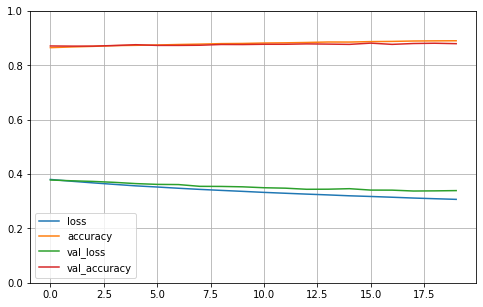

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [17]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.37402215600013733, 0.8679999709129333]